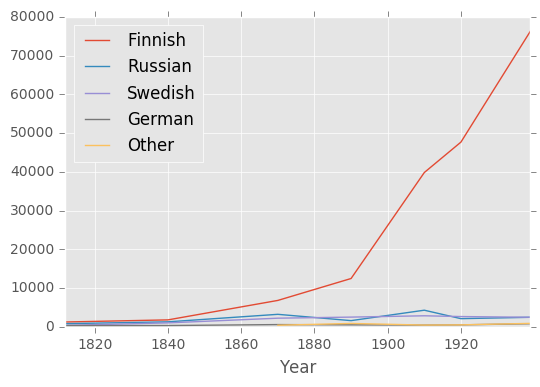

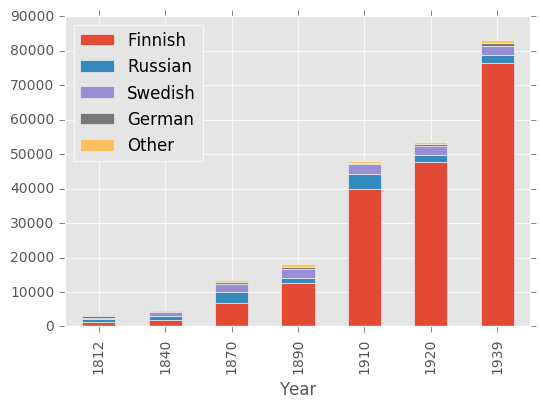

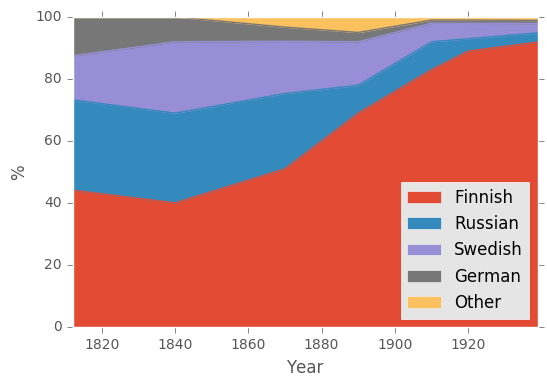

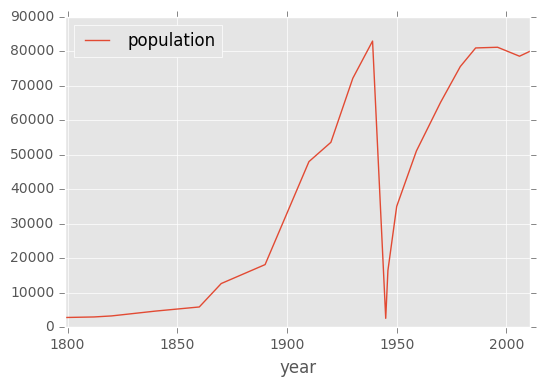

In [ ]:
import io

import requests
import pandas as pd

DATA_DIR = 'https://raw.githubusercontent.com/AnttiHaerkoenen/vyborg_historical_town_atlas/master/data'


def get_csv(file, data_dir=DATA_DIR):
    url = '{0}/{1}'.format(data_dir, file)
    s = requests.get(url).content
    csv = io.StringIO(s.decode('utf-8'))
    return csv


lang_groups = pd.read_csv(get_csv('lang_groups_1812_1939.csv'))
totals = lang_groups[lang_groups.columns[1:]].sum(axis=1)
lang_group_proportions = pd.DataFrame({'year': lang_groups['year']})
lang_group_proportions[lang_groups.columns[1:]] = lang_groups[lang_groups.columns[1:]].div(totals, axis=0) * 100

population_change = pd.read_csv(get_csv('population_1799_2011.csv'))

lang_groups.columns = [name.capitalize() for name in lang_groups.columns]
lang_group_proportions.columns = lang_groups.columns


# Sources

### Language groups

- Hämynen, Tapio; Shikalov, Yury 2012
- Kaukiainen 2013
- Tandefelt 2013

### Population

- Viipurin läänin järjestämiskomitea E 8-9; Viipurin väkilukutaulut 1870-1920, Tilastokeskus
- SVT VI Viipurin kaupungin väestölaskennat
- Hämynen, Tapio; Shikalov, Yury 2012
- Venäjän väestölaskennat 1996-2011